# What patterns can we find in the data that are correlated with increases and decreases in the number of parking tickets issued by newyork city parking authority ? 

### importing necessary library

In [1]:
import dask.dataframe as dd # for lazy evaluation 
from dask.diagnostics import ProgressBar #to see progress of the process
import pandas as pd #data processing
import numpy as np # linear algebra
import seaborn as sns # for plotting the data
import matplotlib.pyplot as plt
import numpy as np #linear algebra

In [2]:
 #read the data using dask 
df1 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv")
df2 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2015.csv")
df3 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2016.csv")
df4 = dd.read_csv("./Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [3]:
from functools import reduce

### common_columns of all dataframe

In [4]:
# gives list of common_columns of all dataframe
columns = [set(df1.columns),set(df2.columns),set(df3.columns),set(df4.columns)]
common_columns = list(reduce(lambda x,y: x.intersection(y),columns))

In [5]:
common_columns

['From Hours In Effect',
 'Violation In Front Of Or Opposite',
 'Violation Code',
 'Vehicle Make',
 'Vehicle Expiration Date',
 'Violation Legal Code',
 'Date First Observed',
 'Violation Description',
 'Street Name',
 'Intersecting Street',
 'Vehicle Year',
 'Plate ID',
 'Vehicle Color',
 'Plate Type',
 'Meter Number',
 'Violation Time',
 'Street Code2',
 'Issuer Code',
 'House Number',
 'Issuing Agency',
 'Summons Number',
 'Street Code1',
 'Feet From Curb',
 'Time First Observed',
 'No Standing or Stopping Violation',
 'Issuer Squad',
 'Law Section',
 'Street Code3',
 'Sub Division',
 'Violation County',
 'Violation Precinct',
 'Vehicle Body Type',
 'Registration State',
 'Hydrant Violation',
 'Violation Location',
 'Violation Post Code',
 'Issuer Precinct',
 'Issue Date',
 'Days Parking In Effect    ',
 'Double Parking Violation',
 'To Hours In Effect',
 'Unregistered Vehicle?',
 'Issuer Command']

### coverting variables datatypes to its origin datatype

In [6]:
dtypes={'Date First Observed': np.str,
 'Days Parking In Effect    ': np.str,
 'Double Parking Violation': np.str,
 'Feet From Curb': np.float32,
 'From Hours In Effect': np.str,
 'House Number': np.str,
 'Hydrant Violation': np.str,
 'Intersecting Street': np.str,
 'Issue Date': np.str,
 'Issuer Code': np.float32,
 'Issuer Command': np.str,
 'Issuer Precinct': np.float32,
 'Issuer Squad': np.str,
 'Issuing Agency': np.str,
 'Law Section': np.float32,
 'Meter Number': np.str,
 'No Standing or Stopping Violation': np.str,
 'Plate ID': np.str,
 'Plate Type': np.str,
 'Registration State': np.str,
 'Street Code1': np.uint32,
 'Street Code2': np.uint32,
 'Street Code3': np.uint32,
 'Street Name': np.str,
 'Sub Division': np.str,
 'Summons Number': np.uint32,
 'Time First Observed': np.str,
 'To Hours In Effect': np.str,
 'Unregistered Vehicle?': np.str,
 'Vehicle Body Type': np.str,
 'Vehicle Color': np.str,
 'Vehicle Expiration Date': np.str,
 'Vehicle Make': np.str,
 'Vehicle Year': np.float32,
 'Violation Code': np.uint16,
 'Violation County': np.str,
 'Violation Description': np.str,
 'Violation In Front Of Or Opposite': np.str,
 'Violation Legal Code': np.str,
 'Violation Location': np.str,
 'Violation Post Code': np.str,
 'Violation Precinct': np.float32,
 'Violation Time': np.str
       }


In [7]:
nyc_data = dd.read_csv('./*.csv', dtype=dtypes, usecols=common_columns) #read common_columns of all dataframe and convert them into one dataframe

In [8]:
#show percentage of nan values of particular columns
missing_values = nyc_data.isnull().sum()
with ProgressBar():
    percent_missing = ((missing_values / nyc_data.index.size) * 100).compute()
percent_missing


[########################################] | 100% Completed |  4min 46.3s


Summons Number                        0.000000
Plate ID                              0.020867
Registration State                    0.000000
Plate Type                            0.000000
Issue Date                            0.000000
Violation Code                        0.000000
Vehicle Body Type                     0.564922
Vehicle Make                          0.650526
Issuing Agency                        0.000000
Street Code1                          0.000000
Street Code2                          0.000000
Street Code3                          0.000000
Vehicle Expiration Date               0.000002
Violation Location                   15.142846
Violation Precinct                    0.000002
Issuer Precinct                       0.000002
Issuer Code                           0.000002
Issuer Command                       15.018851
Issuer Squad                         15.022566
Violation Time                        0.019207
Time First Observed                  90.040886
Violation Cou

### dropping columns with nan values

In [9]:
#drop columns which has more than 1% nan value
columns_to_drop = list(percent_missing[percent_missing >= 1].index)
nyc_data_new = nyc_data.drop(columns_to_drop, axis=1)

In [10]:
nyc_data_new.dtypes

Summons Number              uint32
Plate ID                    object
Registration State          object
Plate Type                  object
Issue Date                  object
Violation Code              uint16
Vehicle Body Type           object
Vehicle Make                object
Issuing Agency              object
Street Code1                uint32
Street Code2                uint32
Street Code3                uint32
Vehicle Expiration Date     object
Violation Precinct         float32
Issuer Precinct            float32
Issuer Code                float32
Violation Time              object
Street Name                 object
Date First Observed         object
Law Section                float32
Sub Division                object
Vehicle Year               float32
Feet From Curb             float32
dtype: object

In [11]:
nyc_data_new.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Precinct,Issuer Precinct,Issuer Code,Violation Time,Street Name,Date First Observed,Law Section,Sub Division,Vehicle Year,Feet From Curb
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,33.0,33.0,921043.0,0752A,W 175 ST,0,408.0,F1,2013.0,0.0
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,33.0,33.0,921043.0,1240P,W 177 ST,0,408.0,C,2012.0,0.0
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,33.0,33.0,921043.0,1243P,W 163 ST,0,408.0,F7,0.0,0.0
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,33.0,33.0,921043.0,0232P,W 176 ST,0,408.0,F1,2010.0,0.0
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,33.0,33.0,921043.0,1239P,W 174 ST,0,408.0,E1,2012.0,0.0


In [12]:
nyc_data_new.shape

(Delayed('int-e4624ef7-d590-4c0e-aafc-5df2b6a5d398'), 23)

## >>>>correlation matrix is a table showing correlation coefficients between variables.


In [13]:
correlation_matrix=nyc_data_new.corr( method='pearson') 

In [14]:
correlation_matrix.head(15)   

C:\Users\HP\anaconda3\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 15 elements requested, only 11 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,Summons Number,Violation Code,Street Code1,Street Code2,Street Code3,Violation Precinct,Issuer Precinct,Issuer Code,Law Section,Vehicle Year,Feet From Curb
Summons Number,1.000000,0.080118,0.324586,0.214768,0.224672,0.302288,0.126804,0.094536,-0.703685,-0.129257,0.040069
Violation Code,0.080118,1.000000,0.085219,0.094581,0.094990,0.175573,0.131635,0.232991,-0.231190,0.008802,0.039156
Street Code1,0.324586,0.085219,1.000000,0.425152,0.423669,0.383627,0.233090,0.311345,-0.472149,-0.092881,0.032160
Street Code2,0.214768,0.094581,0.425152,1.000000,0.670815,0.319657,0.212063,0.321989,-0.388299,-0.070361,0.013748
Street Code3,0.224672,0.094990,0.423669,0.670815,1.000000,0.322557,0.211284,0.318284,-0.394844,-0.071838,0.013485
Violation Precinct,0.302288,0.175573,0.383627,0.319657,0.322557,1.000000,0.597774,0.334044,-0.485364,-0.009360,0.036115
Issuer Precinct,0.126804,0.131635,0.233090,0.212063,0.211284,0.597774,1.000000,0.298179,-0.328725,-0.013614,0.023831
Issuer Code,0.094536,0.232991,0.311345,0.321989,0.318284,0.334044,0.298179,1.000000,-0.665387,-0.164158,0.048914
Law Section,-0.703685,-0.231190,-0.472149,-0.388299,-0.394844,-0.485364,-0.328725,-0.665387,1.000000,0.212087,-0.061432
Vehicle Year,-0.129257,0.008802,-0.092881,-0.070361,-0.071838,-0.009360,-0.013614,-0.164158,0.212087,1.000000,-0.035340


### The possible range of values for the correlation coefficient is -1.0 to 1.0.
### Values closer to zero means there is no linear trend between the two variables. 
### The close to 1 the correlation is the more positively correlated they are, that is as one increases so does the other and the closer to 1 the stronger this relationship is.
### A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

<AxesSubplot:>

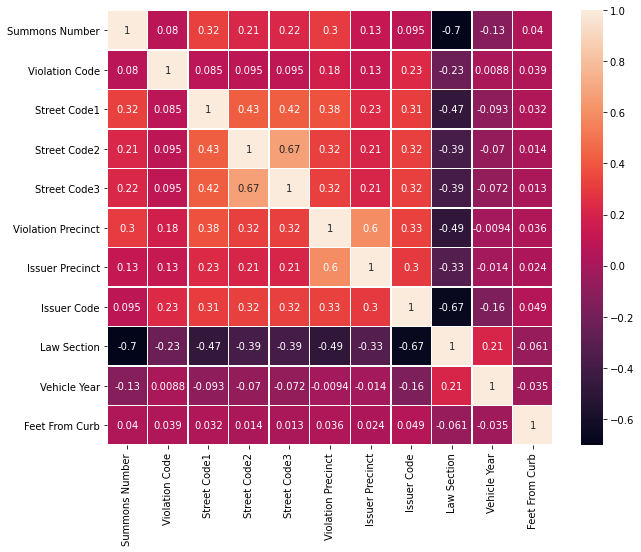

In [15]:
# create seaborn heatmap with required labels
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns,linewidths=.5,annot=True)

### from the above heatmap..we conclude that ..
### Each square shows the correlation between the variables on each axis.
### Correlation ranges from -1 to +1. 
### The diagonal squares  shows each variable with itself has a perfect correlation.
### the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.
### Here street code 2 has a positive correlation with street code 3 and issuer precinct has a positive correlation with violation precinct. and like others are.. which have coefficient value is greater than 0.5.
### law section has a negative correlation with summons number and issuer date..that means as law section value increases summon number and issuer code decreases.and so others are ..which have coefficient value is less than -0.5